In [18]:
from matplotlib import pyplot as plt

In [35]:
def convBandwidth(input):
    if input[-4:] == "Mbps" : return ((10**6) * float(input[:-4]))/8
    elif input[-4:] == "MBps" : return (10**6) * float(input[:-4])
    elif input[-3:] == "Bps" : return float(input[:-3])
    elif input[-3:] == "bps"    : return float(input[:-3])/8
    else:
        print("conversion not supported")
        return -1

def convTime(input):
    if input[-2:] == "ms" : return (10**(-3) * float(input[:-2]))
    elif input[-1:] == "s" : return float(input[:-1])
    elif input[-3:] == "sec" : return float(input[:-3])
    else:
        print("conversion not supported")
        return -1


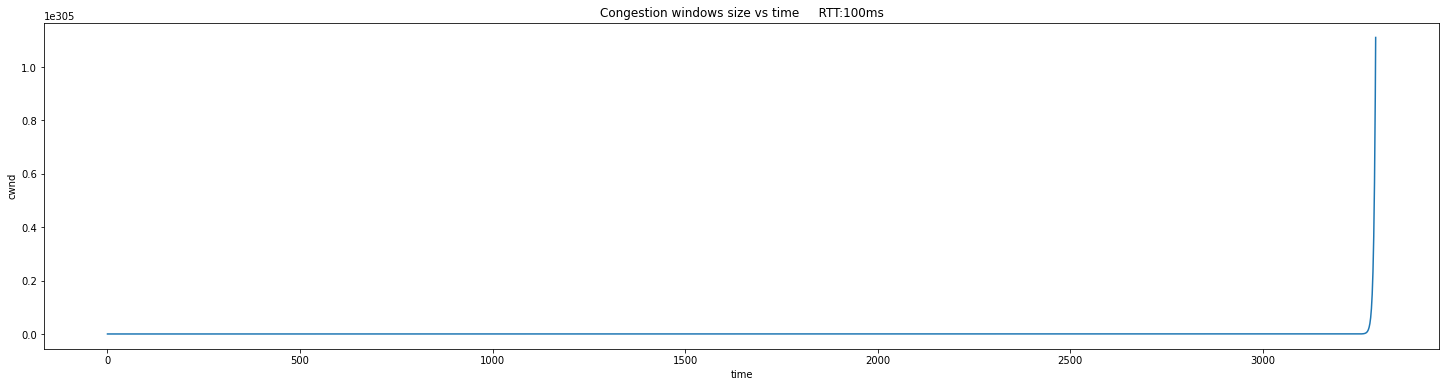

In [37]:
# Discrete time interval 
deltaTime_str = "1sec"
deltaTime = convTime(deltaTime_str)

class queueObj:
    maxSizeBytes = 0
    currSizeBytes = 0.00000000001 
    
    # will get updated after constructor call
    btlnkBandwidth = 1 
    queueingDelay = currSizeBytes/btlnkBandwidth
    
    def __init__(self, maxSizeBytes, btlnkBandwidth):
        self.maxSizeBytes = maxSizeBytes
        self.btlnkBandwidth = btlnkBandwidth
        
            
    def updateSize(cwndSizeBytes, RTT):
        currSizeBytes = currSizeBytes + deltaTime*(cwndSizeBytes/RTT - btlnkBandwidth)
        queueingDelay = currSizeBytes/btlnkBandwidth

    
# phase : Congestion controlled  or Pacing controlled
# Ti : RTT min for a flow i 
# D : Queueing delay for all flows    
def MIMD( phase, Ti, D):
    if ( phase == "pacing" ): return (1.25 * Ti)/(Ti + D)
    else: return (2 * Ti)/(Ti + D)
    


def Simul():
    starttime = 0
    endtime = 1000
    
    
    pktsize = 1500
    queueL = "2084p"
    queueSizeBytes = pktsize*int(queueL[:-1])
    
    btlnkBandwidth_str = "100Mbps"
    btlnkBandwidth = convBandwidth(btlnkBandwidth_str)
    
    # Creating a queue for the bottleneck link
    qobj = queueObj(queueSizeBytes, btlnkBandwidth)
    
    # We will decide the RTT
    RTT_str = "100ms"
    RTT = convTime(RTT_str)
        
    cwndSize = 0.00000000001
    
    cwndSizeStore = {}
    currtime = starttime
    while currtime <= endtime:
        
        # simulation starts here
        cwndSize = cwndSize * MIMD("pacing", RTT, qobj.queueingDelay)       
        
        cwndSizeStore[currtime] = cwndSize/1500
        currtime = currtime + deltaTime
    
        
    f = plt.figure()
    f.set_figwidth(25)
    f.set_figheight(6)
    
    plt.plot(cwndSizeStore.keys(), cwndSizeStore.values())
    plt.xlabel("time")
    plt.ylabel("cwnd")x
    plt.title(f"Congestion windows size vs time     RTT:{RTT_str}")
    
    
            
Simul()

    
        

In [12]:
str = "hello"
print(str[:-4])

h
